In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage import data, color, feature, io, transform
import skimage.data
import os
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [17]:
images = []
labels = []

# convert lists to NumPy Arrays
X = faces.images                  # features matrix
y = faces.target            # target vector

# Extract HOG features from each image
hog_features = []
for image in X:
    features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(features)

# Convert HOG features and labels to numpy arrays
President = np.array(hog_features)
Name = LabelEncoder().fit_transform(y)
print(Name.shape)

(1348,)


Accuracy: 0.7876543209876543
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.69      0.67        16
     Colin Powell       0.79      0.78      0.79        83
  Donald Rumsfeld       0.81      0.69      0.75        32
    George W Bush       0.88      0.87      0.87       153
Gerhard Schroeder       0.67      0.78      0.72        41
      Hugo Chavez       0.79      0.62      0.70        24
Junichiro Koizumi       0.84      0.84      0.84        19
       Tony Blair       0.61      0.68      0.64        37

         accuracy                           0.79       405
        macro avg       0.75      0.74      0.75       405
     weighted avg       0.79      0.79      0.79       405



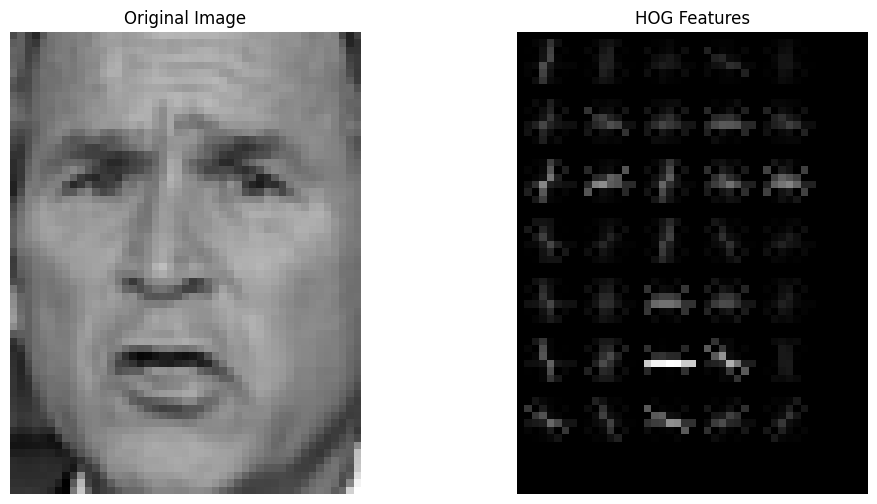

In [19]:
President = X.reshape(X.shape[0], -1)     # convert dataset to be [n_samples, n_features]

Xtrain, Xtest, ytrain, ytest = train_test_split(President, Name, test_size=0.3, random_state=99)

 # Train SVM
from sklearn.metrics import accuracy_score, classification_report
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred = model.predict(Xtest)

# Evaluate the classifier
print(f'Accuracy: {accuracy_score(ytest, y_pred)}')
print(classification_report(ytest, y_pred, target_names=faces.target_names))

# Plot an example of HOG features for visualization
image = X[2]
hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)[1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()